YouTube is a widely used and famous online video platform in the world today. YouTube has a list of trending videos that is updated constantly.Analysing these trending videos can give content creators greater perspective and knowledge for increasing their popularity and brand of their channels.Companies and businesses using social media and digital platforms can also use this analysis to boost their growth in business by publishing videos or sponsoring appropriate channels at the right time.
#### Objectives
To understand characteristics that make a video end up in trending section on YouTube.
To grasp knowledge about YouTube's algorithm and extract key aspects that can be used to improve growth of YouTube channels.
Provide content creators and other digital businesses with information about features required to make a video that trends and reaches maximum people.

In [2]:
import pandas as pd 
import numpy as np
df = pd.read_csv("../input/youtube-trending-video-dataset/US_youtube_trending_data.csv")

In [3]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [4]:
df.categoryId.nunique()

15

In [5]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [6]:
df.categoryId.unique()

array([22, 20, 24, 10, 26, 27, 23, 28,  1, 25, 17, 19, 15,  2, 29])

In [7]:
df.categoryId.value_counts()

24    37551
20    36680
10    30624
17    20719
22    16408
23     9942
1      7417
25     7172
28     5677
26     5162
27     4556
2      3497
19     1035
15      836
29      114
Name: categoryId, dtype: int64

In [8]:
df.corr()

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
categoryId,1.000000,-0.050566,-0.076083,-0.029786,-0.059764,0.073685,0.000309
view_count,-0.050566,1.000000,0.857979,0.528837,0.596008,0.005563,0.010998
likes,-0.076083,0.857979,1.000000,0.513075,0.735359,-0.022803,-0.024456
dislikes,-0.029786,0.528837,0.513075,1.000000,0.438610,0.011710,-0.012974
comment_count,-0.059764,0.596008,0.735359,0.438610,1.000000,-0.015919,-0.004067
comments_disabled,0.073685,0.005563,-0.022803,0.011710,-0.015919,1.000000,0.188428
ratings_disabled,0.000309,0.010998,-0.024456,-0.012974,-0.004067,0.188428,1.000000


In [9]:
corrolation_list = ['view_count', 'likes', 'dislikes', 'comment_count']
df_data=df[corrolation_list].corr()

In [10]:
display(df_data)

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.857979,0.528837,0.596008
likes,0.857979,1.000000,0.513075,0.735359
dislikes,0.528837,0.513075,1.000000,0.438610
comment_count,0.596008,0.735359,0.438610,1.000000


In [11]:
col_list = ['video_id', 'view_count', 'likes', 'dislikes', 'comment_count']
us_yt = pd.read_csv('../input/youtube-trending-video-dataset/US_youtube_trending_data.csv', usecols=col_list) #USA, remaking the dataframe in the same format as the others
ca_yt = pd.read_csv('../input/youtube-trending-video-dataset/CA_youtube_trending_data.csv', usecols=col_list) #Canada
de_yt = pd.read_csv('../input/youtube-trending-video-dataset/DE_youtube_trending_data.csv', usecols=col_list) #Germany
fr_yt = pd.read_csv('../input/youtube-trending-video-dataset/FR_youtube_trending_data.csv', usecols=col_list) #France
gb_yt = pd.read_csv('../input/youtube-trending-video-dataset/GB_youtube_trending_data.csv', usecols=col_list) #United Kingdom (Great Brittain)
in_yt = pd.read_csv('../input/youtube-trending-video-dataset/IN_youtube_trending_data.csv', usecols=col_list) #India
jp_yt = pd.read_csv('../input/youtube-trending-video-dataset/JP_youtube_trending_data.csv', usecols=col_list) #Japan
kr_yt = pd.read_csv('../input/youtube-trending-video-dataset/KR_youtube_trending_data.csv', usecols=col_list) #South Korea
mx_yt = pd.read_csv('../input/youtube-trending-video-dataset/MX_youtube_trending_data.csv', usecols=col_list) #Mexico
ru_yt = pd.read_csv('../input/youtube-trending-video-dataset/RU_youtube_trending_data.csv', usecols=col_list) #Russia

In [12]:
df_list = [us_yt, ca_yt, de_yt, fr_yt, gb_yt, in_yt, jp_yt, kr_yt, mx_yt, ru_yt]
df_name_list = ['United States', 'Canada', 'Germany', 'France', 'Great Brittain', 'India',
                'Japan', 'South Korea', 'Mexico', 'Russia']

In [14]:
views_df = pd.DataFrame(columns=['view_count', 'likes', 'dislikes', 'comment_count'])
likes_df = pd.DataFrame(columns=['view_count', 'likes', 'dislikes', 'comment_count'])

display(views_df, likes_df)

,view_count,likes,dislikes,comment_count


,view_count,likes,dislikes,comment_count


In [15]:
df_name_list[0]

'United States'

In [25]:
print(df_name_list[0])
current_df = df_list[0]
_x = current_df[corrolation_list].corr()
display(_x)

United States


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.857979,0.528837,0.596008
likes,0.857979,1.000000,0.513075,0.735359
dislikes,0.528837,0.513075,1.000000,0.438610
comment_count,0.596008,0.735359,0.438610,1.000000


In [26]:
df_list[0].head()

,video_id,view_count,likes,dislikes,comment_count
0,3C66w5Z0ixs,1514614,156908,5855,35313
1,M9Pmf9AB4Mo,2381688,146739,2794,16549
2,J78aPJ3VyNs,2038853,353787,2628,40221
3,kXLn3HkpjaA,496771,23251,1856,7647
4,VIUo6yapDbc,1123889,45802,964,2196


In [27]:
current_df = df_list[0]

In [28]:
_x=current_df[corrolation_list].corr()

In [29]:
display(_x)

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.857979,0.528837,0.596008
likes,0.857979,1.000000,0.513075,0.735359
dislikes,0.528837,0.513075,1.000000,0.438610
comment_count,0.596008,0.735359,0.438610,1.000000


In [30]:
_x

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.857979,0.528837,0.596008
likes,0.857979,1.000000,0.513075,0.735359
dislikes,0.528837,0.513075,1.000000,0.438610
comment_count,0.596008,0.735359,0.438610,1.000000


In [31]:
count = 0
while count != 10:
    print(df_name_list[count])
    current_df = df_list[count]
    _x = current_df[corrolation_list].corr()
    display(_x)
    count += 1

United States


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.857979,0.528837,0.596008
likes,0.857979,1.000000,0.513075,0.735359
dislikes,0.528837,0.513075,1.000000,0.438610
comment_count,0.596008,0.735359,0.438610,1.000000


Canada


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.831215,0.599812,0.525251
likes,0.831215,1.000000,0.538719,0.697019
dislikes,0.599812,0.538719,1.000000,0.460017
comment_count,0.525251,0.697019,0.460017,1.000000


Germany


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.845944,0.553385,0.533439
likes,0.845944,1.000000,0.506082,0.703184
dislikes,0.553385,0.506082,1.000000,0.454909
comment_count,0.533439,0.703184,0.454909,1.000000


France


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.876204,0.560136,0.717249
likes,0.876204,1.000000,0.556488,0.795262
dislikes,0.560136,0.556488,1.000000,0.575066
comment_count,0.717249,0.795262,0.575066,1.000000


Great Brittain


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.833602,0.563733,0.537599
likes,0.833602,1.000000,0.505950,0.707026
dislikes,0.563733,0.505950,1.000000,0.441411
comment_count,0.537599,0.707026,0.441411,1.000000


India


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.807653,0.124489,0.470470
likes,0.807653,1.000000,0.074802,0.618247
dislikes,0.124489,0.074802,1.000000,0.154924
comment_count,0.470470,0.618247,0.154924,1.000000


Japan


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.884619,0.553649,0.777745
likes,0.884619,1.000000,0.567729,0.824239
dislikes,0.553649,0.567729,1.000000,0.591082
comment_count,0.777745,0.824239,0.591082,1.000000


South Korea


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.872127,0.510735,0.768647
likes,0.872127,1.000000,0.549738,0.814076
dislikes,0.510735,0.549738,1.000000,0.584562
comment_count,0.768647,0.814076,0.584562,1.000000


Mexico


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.844619,0.505408,0.682985
likes,0.844619,1.000000,0.516366,0.755392
dislikes,0.505408,0.516366,1.000000,0.524613
comment_count,0.682985,0.755392,0.524613,1.000000


Russia


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.857332,0.464623,0.641931
likes,0.857332,1.000000,0.469789,0.760687
dislikes,0.464623,0.469789,1.000000,0.468512
comment_count,0.641931,0.760687,0.468512,1.000000


In [28]:
_x

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.860696,0.479372,0.655941
likes,0.860696,1.000000,0.477154,0.767718
dislikes,0.479372,0.477154,1.000000,0.468996
comment_count,0.655941,0.767718,0.468996,1.000000


In [30]:
_x.loc['view_count']

view_count       1.000000
likes            0.860696
dislikes         0.479372
comment_count    0.655941
Name: view_count, dtype: float64

In [32]:
_x.loc['likes']

view_count       0.857332
likes            1.000000
dislikes         0.469789
comment_count    0.760687
Name: likes, dtype: float64

In [33]:
count = 0
while count != 10:
    print(df_name_list[count])
    current_df = df_list[count]
    _x = current_df[corrolation_list].corr()
    display(_x)
    views_df.loc[count] = _x.loc['view_count']
    likes_df.loc[count] = _x.loc['likes']
    count += 1

United States


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.857979,0.528837,0.596008
likes,0.857979,1.000000,0.513075,0.735359
dislikes,0.528837,0.513075,1.000000,0.438610
comment_count,0.596008,0.735359,0.438610,1.000000


Canada


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.831215,0.599812,0.525251
likes,0.831215,1.000000,0.538719,0.697019
dislikes,0.599812,0.538719,1.000000,0.460017
comment_count,0.525251,0.697019,0.460017,1.000000


Germany


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.845944,0.553385,0.533439
likes,0.845944,1.000000,0.506082,0.703184
dislikes,0.553385,0.506082,1.000000,0.454909
comment_count,0.533439,0.703184,0.454909,1.000000


France


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.876204,0.560136,0.717249
likes,0.876204,1.000000,0.556488,0.795262
dislikes,0.560136,0.556488,1.000000,0.575066
comment_count,0.717249,0.795262,0.575066,1.000000


Great Brittain


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.833602,0.563733,0.537599
likes,0.833602,1.000000,0.505950,0.707026
dislikes,0.563733,0.505950,1.000000,0.441411
comment_count,0.537599,0.707026,0.441411,1.000000


India


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.807653,0.124489,0.470470
likes,0.807653,1.000000,0.074802,0.618247
dislikes,0.124489,0.074802,1.000000,0.154924
comment_count,0.470470,0.618247,0.154924,1.000000


Japan


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.884619,0.553649,0.777745
likes,0.884619,1.000000,0.567729,0.824239
dislikes,0.553649,0.567729,1.000000,0.591082
comment_count,0.777745,0.824239,0.591082,1.000000


South Korea


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.872127,0.510735,0.768647
likes,0.872127,1.000000,0.549738,0.814076
dislikes,0.510735,0.549738,1.000000,0.584562
comment_count,0.768647,0.814076,0.584562,1.000000


Mexico


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.844619,0.505408,0.682985
likes,0.844619,1.000000,0.516366,0.755392
dislikes,0.505408,0.516366,1.000000,0.524613
comment_count,0.682985,0.755392,0.524613,1.000000


Russia


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.857332,0.464623,0.641931
likes,0.857332,1.000000,0.469789,0.760687
dislikes,0.464623,0.469789,1.000000,0.468512
comment_count,0.641931,0.760687,0.468512,1.000000


In [34]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [35]:
views_df

,view_count,likes,dislikes,comment_count
0,1.0,0.857979,0.528837,0.596008
1,1.0,0.831215,0.599812,0.525251
2,1.0,0.845944,0.553385,0.533439
3,1.0,0.876204,0.560136,0.717249
4,1.0,0.833602,0.563733,0.537599
5,1.0,0.807653,0.124489,0.470470
6,1.0,0.884619,0.553649,0.777745
7,1.0,0.872127,0.510735,0.768647
8,1.0,0.844619,0.505408,0.682985
9,1.0,0.857332,0.464623,0.641931


In [36]:
_x.loc['view_count']

view_count       1.000000
likes            0.857332
dislikes         0.464623
comment_count    0.641931
Name: view_count, dtype: float64

In [37]:
_x.loc['likes']

view_count       0.857332
likes            1.000000
dislikes         0.469789
comment_count    0.760687
Name: likes, dtype: float64

In [38]:
likes_df

,view_count,likes,dislikes,comment_count
0,0.857979,1.0,0.513075,0.735359
1,0.831215,1.0,0.538719,0.697019
2,0.845944,1.0,0.506082,0.703184
3,0.876204,1.0,0.556488,0.795262
4,0.833602,1.0,0.505950,0.707026
5,0.807653,1.0,0.074802,0.618247
6,0.884619,1.0,0.567729,0.824239
7,0.872127,1.0,0.549738,0.814076
8,0.844619,1.0,0.516366,0.755392
9,0.857332,1.0,0.469789,0.760687


In [39]:
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot

In [44]:
views_df = likes_df.drop(axis=1, labels='view_count') #remove redundant column
views_df.index = df_name_list
display(likes_df)

,view_count,likes,dislikes,comment_count
0,0.857979,1.0,0.513075,0.735359
1,0.831215,1.0,0.538719,0.697019
2,0.845944,1.0,0.506082,0.703184
3,0.876204,1.0,0.556488,0.795262
4,0.833602,1.0,0.505950,0.707026
5,0.807653,1.0,0.074802,0.618247
6,0.884619,1.0,0.567729,0.824239
7,0.872127,1.0,0.549738,0.814076
8,0.844619,1.0,0.516366,0.755392
9,0.857332,1.0,0.469789,0.760687


In [46]:
likes_df = likes_df.drop(axis=1, labels='likes') #remove redundant column
likes_df.index = df_name_list
display(likes_df.style.background_gradient())

,view_count,dislikes,comment_count
United States,0.857979,0.513075,0.735359
Canada,0.831215,0.538719,0.697019
Germany,0.845944,0.506082,0.703184
France,0.876204,0.556488,0.795262
Great Brittain,0.833602,0.505950,0.707026
India,0.807653,0.074802,0.618247
Japan,0.884619,0.567729,0.824239
South Korea,0.872127,0.549738,0.814076
Mexico,0.844619,0.516366,0.755392
Russia,0.857332,0.469789,0.760687


In [47]:
dislikes_df = likes_df.drop(axis=1, labels='dislikes') #remove redundant column
dislikes_df.index = df_name_list
display(dislikes_df.style.background_gradient()) ## Master Data frame with all the corrolation coefficients in relation to likes

,view_count,comment_count
United States,0.857979,0.735359
Canada,0.831215,0.697019
Germany,0.845944,0.703184
France,0.876204,0.795262
Great Brittain,0.833602,0.707026
India,0.807653,0.618247
Japan,0.884619,0.824239
South Korea,0.872127,0.814076
Mexico,0.844619,0.755392
Russia,0.857332,0.760687


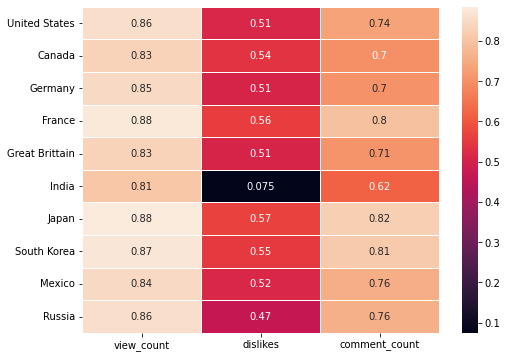

In [48]:
matplotlib.pyplot.figure(figsize=(8,6))
sns.heatmap(likes_df, annot=True, linewidths=.5);

In [49]:
current_df=df_list[0]

In [50]:
len(current_df)

187390

In [51]:
Master_df = pd.DataFrame(columns=['view_count', 'likes', 'dislikes', 'comment_count', 'country'])
display(Master_df)

,view_count,likes,dislikes,comment_count,country


In [52]:
count = 0
entries = 0
while count != 10:
    current_df = df_list[count]
    entries = entries + len(current_df)
    country_name = df_name_list[count]
    current_df['country'] = country_name
    Master_df = pd.merge(Master_df, current_df, how='outer')
    count += 1
print(entries)

1853719


In [53]:
Master_df[corrolation_list].corr()

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.846588,0.191307,0.616863
likes,0.846588,1.000000,0.168560,0.737447
dislikes,0.191307,0.168560,1.000000,0.184358
comment_count,0.616863,0.737447,0.184358,1.000000


In [57]:
Master_df[corrolation_list].corr().style.background_gradient()

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.846588,0.191307,0.616863
likes,0.846588,1.000000,0.168560,0.737447
dislikes,0.191307,0.168560,1.000000,0.184358
comment_count,0.616863,0.737447,0.184358,1.000000


<AxesSubplot:xlabel='view_count', ylabel='likes'>

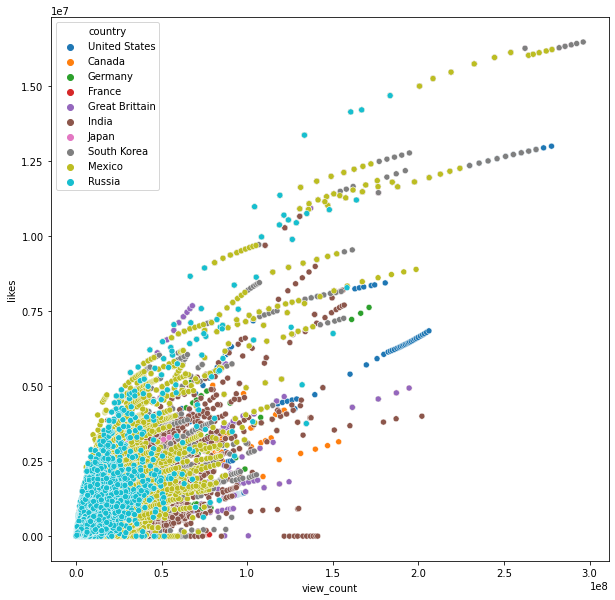

In [59]:
matplotlib.pyplot.figure(figsize=(10,10))
sns.scatterplot(x=Master_df["view_count"], y=Master_df["likes"], hue=Master_df["country"])


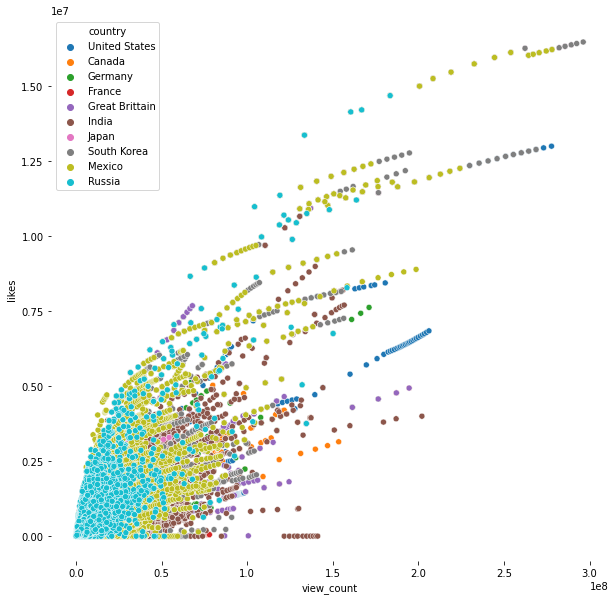

In [64]:
matplotlib.pyplot.figure(figsize=(10,10))
sns.scatterplot(x=Master_df["view_count"], y=Master_df["likes"], hue=Master_df["country"])

sns.despine(bottom=True, left=True);

In [65]:
ind= pd.read_csv('../input/youtube-trending-video-dataset/IN_youtube_trending_data.csv')

In [66]:
l=ind.channelTitle.value_counts()[:10].index

In [67]:
ind.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


In [68]:
l

Index(['Vijay Television', 'Sourav Joshi Vlogs', 'Sony SAB', 'Colors TV',
       'Crazy XYZ', 'ZEE5', 'Asianet', 'Sun TV', 'Colors Rishtey', 'T-Series'],
      dtype='object')

In [70]:
video_count = pd.DataFrame({'channel_title':l,'no_of_videos':ind.channelTitle.value_counts()[:10]})

In [71]:
video_count

,channel_title,no_of_videos
Vijay Television,Vijay Television,2182
Sourav Joshi Vlogs,Sourav Joshi Vlogs,1632
Sony SAB,Sony SAB,1366
Colors TV,Colors TV,1247
Crazy XYZ,Crazy XYZ,1106
ZEE5,ZEE5,1046
Asianet,Asianet,991
Sun TV,Sun TV,934
Colors Rishtey,Colors Rishtey,882
T-Series,T-Series,866


In [72]:
n=ind.channelTitle.value_counts()[:10]

In [73]:
n

Vijay Television      2182
Sourav Joshi Vlogs    1632
Sony SAB              1366
Colors TV             1247
Crazy XYZ             1106
ZEE5                  1046
Asianet                991
Sun TV                 934
Colors Rishtey         882
T-Series               866
Name: channelTitle, dtype: int64

In [75]:
video_count

,channel_title,no_of_videos
Vijay Television,Vijay Television,2182
Sourav Joshi Vlogs,Sourav Joshi Vlogs,1632
Sony SAB,Sony SAB,1366
Colors TV,Colors TV,1247
Crazy XYZ,Crazy XYZ,1106
ZEE5,ZEE5,1046
Asianet,Asianet,991
Sun TV,Sun TV,934
Colors Rishtey,Colors Rishtey,882
T-Series,T-Series,866


In [76]:
z=ind.index

In [77]:
z

RangeIndex(start=0, stop=178839, step=1)

In [78]:
l=ind.channelTitle.value_counts()[:10].index
video_count = pd.DataFrame({'channel_title':l,'no_of_videos':ind.channelTitle.value_counts()[:10]})

In [79]:
video_count

,channel_title,no_of_videos
Vijay Television,Vijay Television,2182
Sourav Joshi Vlogs,Sourav Joshi Vlogs,1632
Sony SAB,Sony SAB,1366
Colors TV,Colors TV,1247
Crazy XYZ,Crazy XYZ,1106
ZEE5,ZEE5,1046
Asianet,Asianet,991
Sun TV,Sun TV,934
Colors Rishtey,Colors Rishtey,882
T-Series,T-Series,866


In [80]:
l=ind.channelTitle.value_counts()[:10].index
video_count = pd.DataFrame({'channel_title':l,'no_of_videos':ind.channelTitle.value_counts()[:10]})

In [81]:
video_count.channel_title.index

Index(['Vijay Television', 'Sourav Joshi Vlogs', 'Sony SAB', 'Colors TV',
       'Crazy XYZ', 'ZEE5', 'Asianet', 'Sun TV', 'Colors Rishtey', 'T-Series'],
      dtype='object')

In [82]:
vi_count = pd.DataFrame({'channel_title':l})

In [83]:
vi_count

,channel_title
0,Vijay Television
1,Sourav Joshi Vlogs
2,Sony SAB
3,Colors TV
4,Crazy XYZ
5,ZEE5
6,Asianet
7,Sun TV
8,Colors Rishtey
9,T-Series


<AxesSubplot:xlabel='no_of_videos', ylabel='channel_title'>

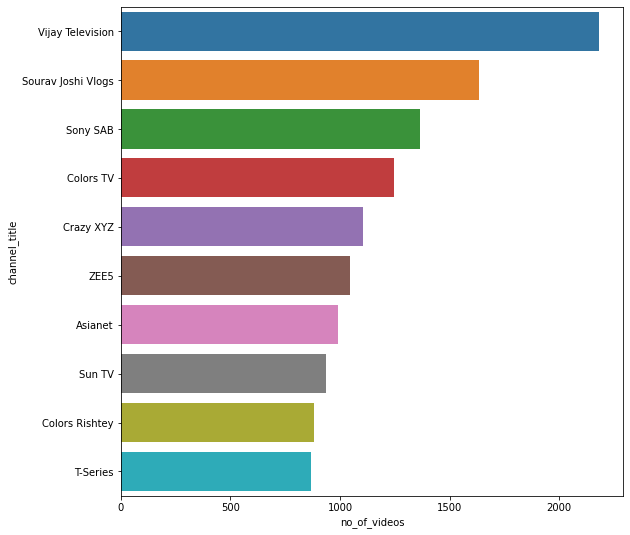

In [84]:
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(y="channel_title",x="no_of_videos",data = video_count)

In [85]:
us= pd.read_csv('../input/youtube-trending-video-dataset/US_youtube_trending_data.csv')
l=us.channelTitle.value_counts()[:10].index
video_count = pd.DataFrame({'channel_title':l,'no_of_videos':us.channelTitle.value_counts()[:10]})

In [86]:
video_count

,channel_title,no_of_videos
NFL,NFL,1280
NBA,NBA,1139
SSSniperWolf,SSSniperWolf,599
NBC Sports,NBC Sports,559
MrBeast Gaming,MrBeast Gaming,512
SSundee,SSundee,511
Saturday Night Live,Saturday Night Live,506
Dude Perfect,Dude Perfect,494
ESPN,ESPN,486
MrBeast,MrBeast,482


In [87]:
print(video_count)

                           channel_title  no_of_videos
NFL                                  NFL          1280
NBA                                  NBA          1139
SSSniperWolf                SSSniperWolf           599
NBC Sports                    NBC Sports           559
MrBeast Gaming            MrBeast Gaming           512
SSundee                          SSundee           511
Saturday Night Live  Saturday Night Live           506
Dude Perfect                Dude Perfect           494
ESPN                                ESPN           486
MrBeast                          MrBeast           482


<AxesSubplot:xlabel='no_of_videos', ylabel='channel_title'>

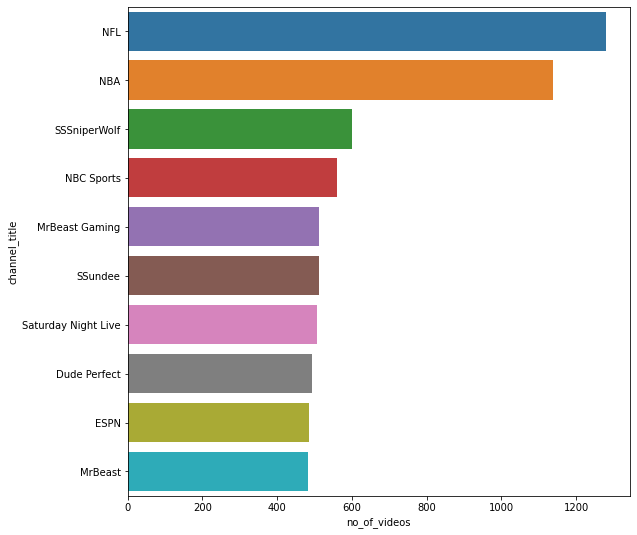

In [88]:
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(y="channel_title",x="no_of_videos",data = video_count)